In [2]:
import re
import pandas as pd

In [3]:
f = open('group chat.txt','r', encoding = 'utf-8')

In [4]:
data = f.read()

In [5]:
data

'26/01/23, 14:04 - Hanumanth NMIT: 5th unit\n26/01/23, 14:04 - Gnanadeep NMIT: This is for unit 5\n26/01/23, 14:05 - Hanumanth NMIT: 1,2,3,4\n26/01/23, 18:04 - Gnanadeep NMIT: https://twitter.com/memesmaadonu/status/1618238872235954176?t=dTacjJSMl3nuuMuSiZ4eiA&s=19\n26/01/23, 18:14 - Abhi NMIT: indirectly to me huh🥲\n26/01/23, 23:32 - Abhi NMIT: What is curse of dimensionality\n26/01/23, 23:43 - Naveen New NMIT: As the dimensions increases we need more data. Without more data leads to less accuracy\n26/01/23, 23:55 - Dilip NMIT: I think it\'s \n\nIf the dimension increases there will be a lot of data\nSo if there is a lot of data it will become difficult to process and learn the model \nSo we try to reduce the dimensionality (attributes)\n27/01/23, 00:04 - Naveen New NMIT: Yeah, that\'s one way, but specifically, having more dimensions segregate the quantity of data into different categories, instead of that generalizing the data(generalizing dimensions of categories) may help for bett

In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages = re.split(pattern, data)[1:]
messages

['Hanumanth NMIT: 5th unit\n',
 'Gnanadeep NMIT: This is for unit 5\n',
 'Hanumanth NMIT: 1,2,3,4\n',
 'Gnanadeep NMIT: https://twitter.com/memesmaadonu/status/1618238872235954176?t=dTacjJSMl3nuuMuSiZ4eiA&s=19\n',
 'Abhi NMIT: indirectly to me huh🥲\n',
 'Abhi NMIT: What is curse of dimensionality\n',
 'Naveen New NMIT: As the dimensions increases we need more data. Without more data leads to less accuracy\n',
 "Dilip NMIT: I think it's \n\nIf the dimension increases there will be a lot of data\nSo if there is a lot of data it will become difficult to process and learn the model \nSo we try to reduce the dimensionality (attributes)\n",
 "Naveen New NMIT: Yeah, that's one way, but specifically, having more dimensions segregate the quantity of data into different categories, instead of that generalizing the data(generalizing dimensions of categories) may help for better accuracy.\n",
 'Dilip NMIT: Ha\n',
 'Naveen New NMIT: Mini max and z-score num are under which topics?\n',
 'Gnanadeep N

In [8]:
dates = re.findall(pattern, data)

In [9]:
dates

['26/01/23, 14:04 - ',
 '26/01/23, 14:04 - ',
 '26/01/23, 14:05 - ',
 '26/01/23, 18:04 - ',
 '26/01/23, 18:14 - ',
 '26/01/23, 23:32 - ',
 '26/01/23, 23:43 - ',
 '26/01/23, 23:55 - ',
 '27/01/23, 00:04 - ',
 '27/01/23, 00:05 - ',
 '27/01/23, 10:06 - ',
 '27/01/23, 10:10 - ',
 '27/01/23, 10:15 - ',
 '27/01/23, 10:15 - ',
 '28/01/23, 18:49 - ',
 '29/01/23, 14:18 - ',
 '30/01/23, 12:18 - ',
 '30/01/23, 12:18 - ',
 '30/01/23, 12:28 - ',
 '31/01/23, 12:15 - ',
 '31/01/23, 12:17 - ',
 '31/01/23, 12:17 - ',
 '31/01/23, 19:54 - ',
 '31/01/23, 20:26 - ',
 '31/01/23, 21:24 - ',
 '01/02/23, 17:37 - ',
 '01/02/23, 17:39 - ',
 '01/02/23, 17:41 - ',
 '01/02/23, 17:41 - ',
 '01/02/23, 17:49 - ',
 '04/02/23, 17:30 - ',
 '05/02/23, 23:57 - ',
 '05/02/23, 23:57 - ',
 '05/02/23, 23:58 - ',
 '05/02/23, 23:58 - ',
 '05/02/23, 23:58 - ',
 '05/02/23, 23:58 - ',
 '05/02/23, 23:59 - ',
 '05/02/23, 23:59 - ',
 '05/02/23, 23:59 - ',
 '05/02/23, 23:59 - ',
 '05/02/23, 23:59 - ',
 '05/02/23, 23:59 - ',
 '06/02/23,

In [10]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})

# convert message_date types

df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')
df.rename(columns = {'message_date':'date'}, inplace = True)

df.head()

,user_message,date
0,Hanumanth NMIT: 5th unit\n,2023-01-26 14:04:00
1,Gnanadeep NMIT: This is for unit 5\n,2023-01-26 14:04:00
2,"Hanumanth NMIT: 1,2,3,4\n",2023-01-26 14:05:00
3,Gnanadeep NMIT: https://twitter.com/memesmaado...,2023-01-26 18:04:00
4,Abhi NMIT: indirectly to me huh🥲\n,2023-01-26 18:14:00


In [11]:
## separate users and messages

users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
        
df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace = True)

df.head()

,date,user,message
0,2023-01-26 14:04:00,Hanumanth NMIT,5th unit\n
1,2023-01-26 14:04:00,Gnanadeep NMIT,This is for unit 5\n
2,2023-01-26 14:05:00,Hanumanth NMIT,"1,2,3,4\n"
3,2023-01-26 18:04:00,Gnanadeep NMIT,https://twitter.com/memesmaadonu/status/161823...
4,2023-01-26 18:14:00,Abhi NMIT,indirectly to me huh🥲\n


In [12]:
df.tail()

,date,user,message
1107,2023-04-03 21:22:00,Gnanadeep NMIT,"No need of tactics, everyone banging\n"
1108,2023-04-03 22:04:00,Gnanadeep NMIT,For which team that guy is impact player\n
1109,2023-04-03 22:08:00,Abhi NMIT,Disimpact player\n
1110,2023-04-03 22:09:00,Gnanadeep NMIT,STK-20230403-WA0023.webp (file attached)\n
1111,2023-04-03 22:23:00,Hanumanth NMIT,https://www.instagram.com/reel/Cpl9es-p-ZT/?ig...


In [13]:
df['date']

0      2023-01-26 14:04:00
1      2023-01-26 14:04:00
2      2023-01-26 14:05:00
3      2023-01-26 18:04:00
4      2023-01-26 18:14:00
               ...        
1107   2023-04-03 21:22:00
1108   2023-04-03 22:04:00
1109   2023-04-03 22:08:00
1110   2023-04-03 22:09:00
1111   2023-04-03 22:23:00
Name: date, Length: 1112, dtype: datetime64[ns]

In [14]:
df['year'] = df['date'].dt.year

In [15]:
df['year']

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
1107    2023
1108    2023
1109    2023
1110    2023
1111    2023
Name: year, Length: 1112, dtype: int64

In [16]:
df['month'] = df['date'].dt.month_name()

In [17]:
df['day'] = df['date'].dt.day

In [18]:
df['hour'] = df['date'].dt.hour

In [19]:
df['minute'] = df['date'].dt.minute

In [20]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-01-26 14:04:00,Hanumanth NMIT,5th unit\n,2023,January,26,14,4
1,2023-01-26 14:04:00,Gnanadeep NMIT,This is for unit 5\n,2023,January,26,14,4
2,2023-01-26 14:05:00,Hanumanth NMIT,"1,2,3,4\n",2023,January,26,14,5
3,2023-01-26 18:04:00,Gnanadeep NMIT,https://twitter.com/memesmaadonu/status/161823...,2023,January,26,18,4
4,2023-01-26 18:14:00,Abhi NMIT,indirectly to me huh🥲\n,2023,January,26,18,14


In [21]:
words = []
for msg in df['message']:
    words.extend(msg.split())

In [22]:
len(words)  ## total number of words

5119

In [25]:
df[df['message'] == '<Media omitted>\n']

,date,user,message,year,month,day,hour,minute
31,2023-02-05 23:57:00,Abhi NMIT,<Media omitted>\n,2023,February,5,23,57
221,2023-02-13 19:04:00,Gnanadeep NMIT,<Media omitted>\n,2023,February,13,19,4
258,2023-02-13 19:15:00,Gnanadeep NMIT,<Media omitted>\n,2023,February,13,19,15
281,2023-02-15 13:11:00,Guru Sai Nath NMIT Sainath,<Media omitted>\n,2023,February,15,13,11
349,2023-02-15 20:13:00,Gnanadeep NMIT,<Media omitted>\n,2023,February,15,20,13
...,...,...,...,...,...,...,...,...
1005,2023-03-31 12:03:00,Naveen New NMIT,<Media omitted>\n,2023,March,31,12,3
1007,2023-03-31 13:31:00,Naveen New NMIT,<Media omitted>\n,2023,March,31,13,31
1012,2023-03-31 19:15:00,Naveen New NMIT,<Media omitted>\n,2023,March,31,19,15
1023,2023-03-31 21:10:00,Naveen New NMIT,<Media omitted>\n,2023,March,31,21,10


In [24]:
df

,date,user,message,year,month,day,hour,minute
0,2023-01-26 14:04:00,Hanumanth NMIT,5th unit\n,2023,January,26,14,4
1,2023-01-26 14:04:00,Gnanadeep NMIT,This is for unit 5\n,2023,January,26,14,4
2,2023-01-26 14:05:00,Hanumanth NMIT,"1,2,3,4\n",2023,January,26,14,5
3,2023-01-26 18:04:00,Gnanadeep NMIT,https://twitter.com/memesmaadonu/status/161823...,2023,January,26,18,4
4,2023-01-26 18:14:00,Abhi NMIT,indirectly to me huh🥲\n,2023,January,26,18,14
...,...,...,...,...,...,...,...,...
1107,2023-04-03 21:22:00,Gnanadeep NMIT,"No need of tactics, everyone banging\n",2023,April,3,21,22
1108,2023-04-03 22:04:00,Gnanadeep NMIT,For which team that guy is impact player\n,2023,April,3,22,4
1109,2023-04-03 22:08:00,Abhi NMIT,Disimpact player\n,2023,April,3,22,8
1110,2023-04-03 22:09:00,Gnanadeep NMIT,STK-20230403-WA0023.webp (file attached)\n,2023,April,3,22,9


In [35]:
from urlextract import URLExtract
extractor = URLExtract()

In [32]:
!pip install urlextract

In [38]:
links =[]
for msg in df['message']:
    print(extractor.find_urls(message))

['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=']
['https://www.instagram.com/reel/Cpl9es-p-ZT/?ig

In [37]:
links

['https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cpl9es-p-ZT/?ig

In [42]:
x = df['user'].value_counts().head()

In [43]:
import matplotlib.pyplot as plt

In [44]:
name = x.index
count = x.values

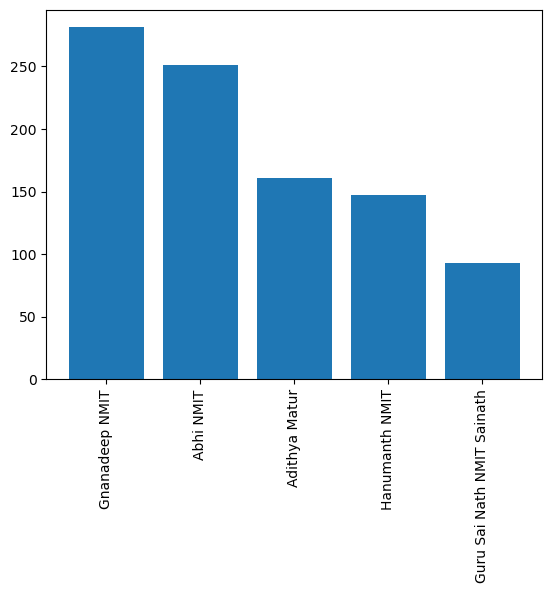

In [46]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [51]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,Gnanadeep NMIT,25.27
1,Abhi NMIT,22.57
2,Adithya Matur,14.48
3,Hanumanth NMIT,13.22
4,Guru Sai Nath NMIT Sainath,8.36
5,Naveen New NMIT,7.55
6,GAGAN SAGAR,3.60
7,Varun Nmit,2.70
8,Dilip NMIT,0.63
9,group_notification,0.45


In [52]:
df['month_num'] = df['date'].dt.month

In [53]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2023-01-26 14:04:00,Hanumanth NMIT,5th unit\n,2023,January,26,14,4,1
1,2023-01-26 14:04:00,Gnanadeep NMIT,This is for unit 5\n,2023,January,26,14,4,1
2,2023-01-26 14:05:00,Hanumanth NMIT,"1,2,3,4\n",2023,January,26,14,5,1
3,2023-01-26 18:04:00,Gnanadeep NMIT,https://twitter.com/memesmaadonu/status/161823...,2023,January,26,18,4,1
4,2023-01-26 18:14:00,Abhi NMIT,indirectly to me huh🥲\n,2023,January,26,18,14,1
...,...,...,...,...,...,...,...,...,...
1107,2023-04-03 21:22:00,Gnanadeep NMIT,"No need of tactics, everyone banging\n",2023,April,3,21,22,4
1108,2023-04-03 22:04:00,Gnanadeep NMIT,For which team that guy is impact player\n,2023,April,3,22,4,4
1109,2023-04-03 22:08:00,Abhi NMIT,Disimpact player\n,2023,April,3,22,8,4
1110,2023-04-03 22:09:00,Gnanadeep NMIT,STK-20230403-WA0023.webp (file attached)\n,2023,April,3,22,9,4


In [55]:
timeline = df.groupby(['year','month_num', 'month']).count()['message'].reset_index()

In [56]:
timeline

,year,month_num,month,message
0,2023,1,January,25
1,2023,2,February,379
2,2023,3,March,622
3,2023,4,April,86


In [58]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-"+str(timeline['year'][i]))

In [61]:
timeline['time'] = time

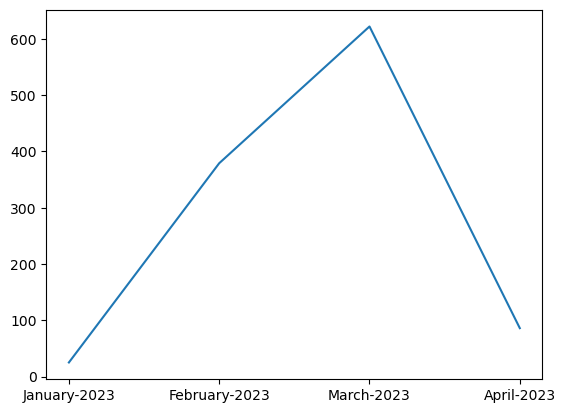

In [63]:
plt.plot(timeline['time'],timeline['message'])
plt.show()

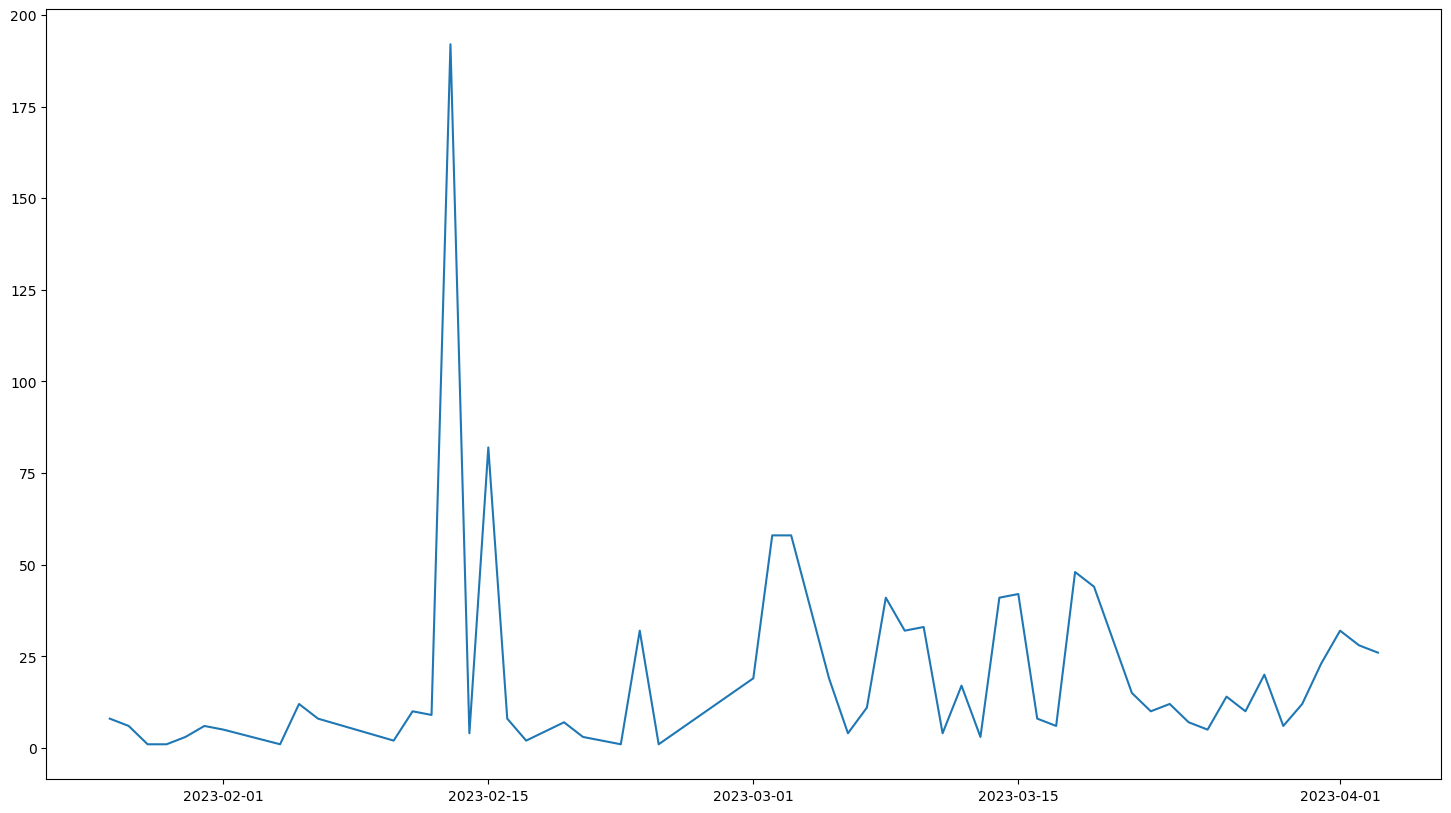

In [64]:
df['only_date'] = df['date'].dt.date

daily_timeline = df.groupby('only_date').count()['message'].reset_index()

plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [65]:
df['day_name'] = df['date'].dt.day_name()

df['day_name'].value_counts()

Monday       249
Wednesday    206
Thursday     170
Sunday       151
Friday       138
Saturday     101
Tuesday       97
Name: day_name, dtype: int64